### Cleaning and processing the data fetched from the Spotify API

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
spotify_data = pd.read_csv('../data/local/spotify_million_tracks.csv')

spotify_data.head()

,original_title,original_artist,spotify_title,spotify_artist,album,release_date,popularity,duration_ms,explicit,album_cover,genres
0,Je Sais Que La Terre Est Plate,Raphaël,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008-03-14,14,150040,False,https://i.scdn.co/image/ab67616d0000b2739e6b95...,"['variété française', 'chanson', 'french pop',..."
1,On Efface,Julie Zenatti,On efface,Julie Zenatti,Comme vous...,2004-03-21,1,253000,False,https://i.scdn.co/image/ab67616d0000b27398d445...,"['variété française', 'french pop', 'chanson']"
2,Howells Delight,The Baltimore Consort,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011-02-01,0,240400,False,https://i.scdn.co/image/ab67616d0000b273ec785e...,"['medieval', 'chamber music', 'swedish ballads']"
3,Martha Served,I Hate Sally,Martha Served,I Hate Sally,Don't Worry Lady,2007-06-12,2,138760,True,https://i.scdn.co/image/ab67616d0000b273e6d949...,"['hardcore punk', 'screamo']"
4,Zip-A-Dee-Doo-Dah,Orlando Pops Orchestra,"Zip-a-Dee-Doo-Dah (From ""Song of the South"")",Orlando Pops Orchestra,"Most Amazing Movie, Musical & TV Themes, Vol.6",2022-10-07,0,199986,False,https://i.scdn.co/image/ab67616d0000b27349ea4d...,NaN


#### Data overview

In [13]:
def display_basic_info(df):
    """
    Display basic information about the dataset including shape, data types, and missing values
    """
    print('Dataset Shape:', df.shape)
    print('\nData Types:')
    print(df.dtypes)
    print('\nMissing Values:')
    print(df.isnull().sum())

def display_numerical_summary(df):
    """
    Display summary statistics for numerical columns
    """
    print('Numerical Columns Summary:')
    print(df.describe())

def check_duplicates(df):
    """
    Check for duplicate entries in the dataset
    """
    duplicates = df.duplicated().sum()
    print(f'Number of duplicate entries: {duplicates}')
    
def display_unique_values(df, columns):
    """
    Display number of unique values for specified columns, with special handling for the genres column
    """
    print('Unique Values Count:')
    for col in columns:
        if col == 'genres':
            all_genres = []
            for genre_list in df[col].dropna():
                if isinstance(genre_list, str):
                    genre_list = eval(genre_list)
                all_genres.extend(genre_list)
            unique_genres = len(set(all_genres))
            print(f'{col}: {unique_genres} unique genres')
        else:
            print(f'{col}: {df[col].nunique()} unique values')

display_basic_info(spotify_data)
display_numerical_summary(spotify_data)
check_duplicates(spotify_data)
display_unique_values(spotify_data, ['original_artist', 'genres'])

Dataset Shape: (394, 11)

Data Types:
original_title     object
original_artist    object
spotify_title      object
spotify_artist     object
album              object
release_date       object
popularity          int64
duration_ms         int64
explicit             bool
album_cover        object
genres             object
dtype: object

Missing Values:
original_title      0
original_artist     0
spotify_title       0
spotify_artist      0
album               0
release_date        0
popularity          0
duration_ms         0
explicit            0
album_cover         0
genres             70
dtype: int64
Numerical Columns Summary:
       popularity    duration_ms
count  394.000000     394.000000
mean    13.736041  236075.035533
std     17.388726   96807.814653
min      0.000000   24333.000000
25%      0.000000  172780.000000
50%      6.500000  221859.500000
75%     22.000000  278106.250000
max     80.000000  720533.000000
Number of duplicate entries: 0
Unique Values Count:
original_artis

#### Drop duplicates and empty values, reset index

In [14]:
spotify_data = spotify_data.dropna().drop_duplicates().reset_index(drop=True)
display_basic_info(spotify_data)

Dataset Shape: (324, 11)

Data Types:
original_title     object
original_artist    object
spotify_title      object
spotify_artist     object
album              object
release_date       object
popularity          int64
duration_ms         int64
explicit             bool
album_cover        object
genres             object
dtype: object

Missing Values:
original_title     0
original_artist    0
spotify_title      0
spotify_artist     0
album              0
release_date       0
popularity         0
duration_ms        0
explicit           0
album_cover        0
genres             0
dtype: int64


#### Standardize release year

In [15]:
def standardize_release_year(df):
    """
    Standardize release_date column to only show years.
    Handles both YYYY and YYYY-MM-DD formats.
    """
    df = df.copy()
    
    df['release_date'] = df['release_date'].apply(lambda x: str(x)[:4]) # extract year from release_date
    
    df['release_date'] = pd.to_numeric(df['release_date'], errors='coerce')
    
    return df

spotify_data = standardize_release_year(spotify_data)

In [16]:
spotify_data.head()

,original_title,original_artist,spotify_title,spotify_artist,album,release_date,popularity,duration_ms,explicit,album_cover,genres
0,Je Sais Que La Terre Est Plate,Raphaël,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008,14,150040,False,https://i.scdn.co/image/ab67616d0000b2739e6b95...,"['variété française', 'chanson', 'french pop',..."
1,On Efface,Julie Zenatti,On efface,Julie Zenatti,Comme vous...,2004,1,253000,False,https://i.scdn.co/image/ab67616d0000b27398d445...,"['variété française', 'french pop', 'chanson']"
2,Howells Delight,The Baltimore Consort,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011,0,240400,False,https://i.scdn.co/image/ab67616d0000b273ec785e...,"['medieval', 'chamber music', 'swedish ballads']"
3,Martha Served,I Hate Sally,Martha Served,I Hate Sally,Don't Worry Lady,2007,2,138760,True,https://i.scdn.co/image/ab67616d0000b273e6d949...,"['hardcore punk', 'screamo']"
4,Liquid Time,Brand X,Liquid Time,Brand X,X Communication : Trilogy II,1992,5,279360,False,https://i.scdn.co/image/ab67616d0000b27393de17...,"['jazz fusion', 'progressive rock', 'art rock'..."


#### Track duration to seconds

In [17]:
def add_duration_seconds(df):
    """
    Convert duration from milliseconds to seconds and add as new column 'duration_sec'
    """
    df = df.copy()
    
    df['duration_sec'] = (df['duration_ms'] / 1000).round(0).astype(int) # convert to seconds and round to integers
    
    return df

spotify_data = add_duration_seconds(spotify_data)

print(spotify_data[['duration_ms', 'duration_sec']].head())

   duration_ms  duration_sec
0       150040           150
1       253000           253
2       240400           240
3       138760           139
4       279360           279


#### Drop and rename columns

In [18]:
def drop_columns(df):
    """
    Drop defined columns from the dataset
    """
    columns_to_drop = [
        'original_title',
        'original_artist',        
        'duration_ms',   
    ]
    
    df = df.drop(columns=columns_to_drop, errors='ignore')
    return df

spotify_data = drop_columns(spotify_data)

print('Remaining columns:')
print(spotify_data.columns.tolist())

Remaining columns:
['spotify_title', 'spotify_artist', 'album', 'release_date', 'popularity', 'explicit', 'album_cover', 'genres', 'duration_sec']


In [19]:
def rename_columns(df):
    """
    Rename columns to more intuitive names
    """
    column_mapping = {
        'spotify_title': 'title',
        'spotify_artist': 'artist',
        'release_date': 'release_year',
        'explicit': 'is_explicit',
        'duration_sec': 'duration_seconds'
    }
    
    df = df.rename(columns=column_mapping)
    return df

spotify_data = rename_columns(spotify_data)

print('New column names:')
print(spotify_data.columns.tolist())

New column names:
['title', 'artist', 'album', 'release_year', 'popularity', 'is_explicit', 'album_cover', 'genres', 'duration_seconds']


Reorder columns

In [20]:
spotify_data = spotify_data[['title', 'artist', 'album', 'release_year', 'popularity', 'genres', 'is_explicit',  'duration_seconds', 'album_cover']]

In [21]:
display(spotify_data)

,title,artist,album,release_year,popularity,genres,is_explicit,duration_seconds,album_cover
0,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008,14,"['variété française', 'chanson', 'french pop',...",False,150,https://i.scdn.co/image/ab67616d0000b2739e6b95...
1,On efface,Julie Zenatti,Comme vous...,2004,1,"['variété française', 'french pop', 'chanson']",False,253,https://i.scdn.co/image/ab67616d0000b27398d445...
2,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011,0,"['medieval', 'chamber music', 'swedish ballads']",False,240,https://i.scdn.co/image/ab67616d0000b273ec785e...
3,Martha Served,I Hate Sally,Don't Worry Lady,2007,2,"['hardcore punk', 'screamo']",True,139,https://i.scdn.co/image/ab67616d0000b273e6d949...
4,Liquid Time,Brand X,X Communication : Trilogy II,1992,5,"['jazz fusion', 'progressive rock', 'art rock'...",False,279,https://i.scdn.co/image/ab67616d0000b27393de17...
...,...,...,...,...,...,...,...,...,...
319,Tu Quieres Volver,Gipsy Kings,Gipsy Kings,1987,45,['flamenco'],False,192,https://i.scdn.co/image/ab67616d0000b2736e7cb1...
320,Cable,Languis,Split,2007,0,"['idm', 'post-rock']",False,199,https://i.scdn.co/image/ab67616d0000b273bebc52...
321,Get 'em - Album Version (Edited),Redman,Red Gone Wild,2007,0,"['east coast hip hop', 'hardcore hip hop', 'hi...",False,204,https://i.scdn.co/image/ab67616d0000b27357b9a6...
322,Romanza,Hard Romantic,"Sincerely,",2010,1,['neoclassical'],False,270,https://i.scdn.co/image/ab67616d0000b273974284...


#### Check the most common words in the genres column


Top 25 most common words in genres:
rock: 116
blues: 72
metal: 60
punk: 57
pop: 51
jazz: 37
country: 34
reggae: 33
hardcore: 29
christian: 29
hop: 27
hip: 24
classic: 18
latin: 17
roots: 16
alternative: 15
traditional: 14
house: 14
post: 13
cha: 12
folk: 12
melodic: 12
rap: 11
glam: 11
modern: 11


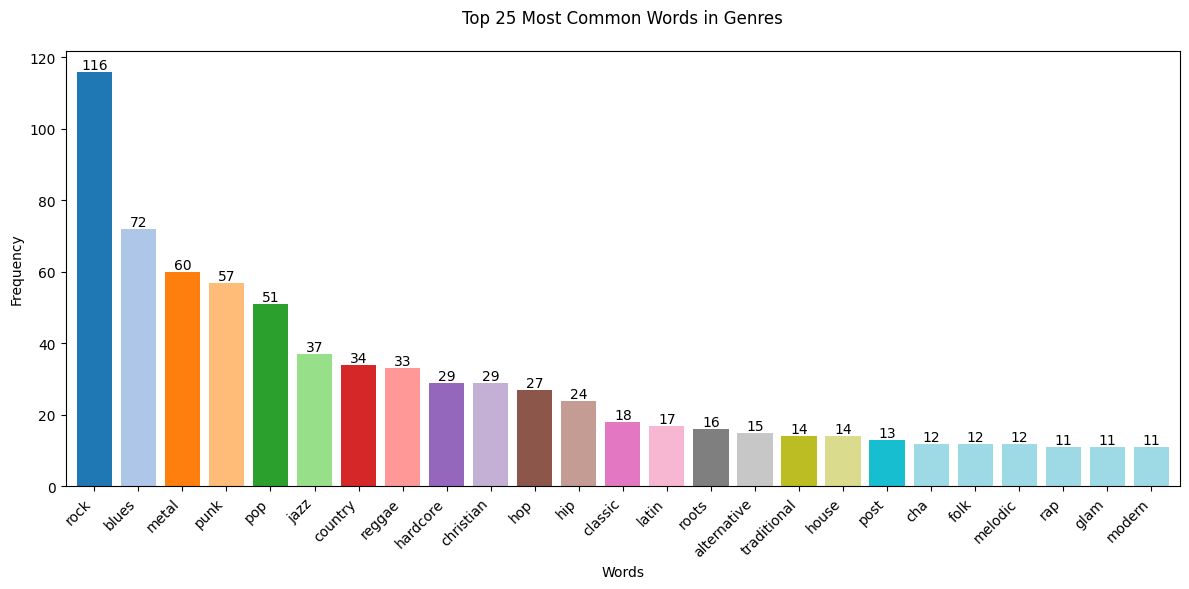

In [26]:
def analyze_genre_words(df, n_words=25):
    """
    Analyze the most common words in the genres column.
    Splits on both spaces and hyphens.
    
    Parameters:
    df : DataFrame containing the genres column
    n_words : Number of top words to display (default=30)
    """
    all_words = []
    
    for genre_list in df['genres'].dropna():    # iterate through every row
        if isinstance(genre_list, str):
            genre_list = eval(genre_list)
            
        for genre in genre_list:    # split by spaces and hyphens
            space_split = genre.split()
            for term in space_split:
                hyphen_split = term.split('-')
                all_words.extend(hyphen_split)
    
    all_words = [word.lower() for word in all_words] # convert to lowercase
    
    word_freq = pd.Series(all_words).value_counts() # count frequencies
    
    plt.figure(figsize=(12, 6))
    ax = word_freq.head(n_words).plot(
        kind='bar',
        color=plt.cm.tab20(np.arange(n_words)),  
        width=0.8
    )
    
    plt.title(f'Top {n_words} Most Common Words in Genres', pad=20)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    
    for i, v in enumerate(word_freq.head(n_words)):
        ax.text(
            i, v, str(v), 
            ha='center', va='bottom'
        )
    
    plt.tight_layout()
    
    print(f'\nTop {n_words} most common words in genres:')
    for word, count in word_freq.head(n_words).items():
        print(f"{word}: {count}")
    
    return word_freq

word_frequencies = analyze_genre_words(spotify_data)

#### Hot encode genres

In [23]:
def hot_encode_genre_words(df, word_list):
    """
    Create binary columns for each genre word in the word_list.
    Returns a dataframe with new columns indicating if each word appears in the genres.
    """
    df = df.copy()
       
    for word in word_list:
        df[word] = 0 # init columns with 0
    
    for idx, row in df.iterrows():  # iterate through rows
        genre_list = row['genres']
        if isinstance(genre_list, str):
            genre_list = eval(genre_list)
            
        words = []
        for genre in genre_list:
            space_split = genre.split()
            for term in space_split:
                words.extend(term.split('-'))
        
        words = [w.lower() for w in words]
        
        if 'hip' in words and 'hop' in words:   # special case for hip-hop
            words.append('hip-hop')
        
        for word in word_list:  # set binary values
            if word in words:
                df.at[idx, word] = 1
    
    return df

# define most common genres to encode
most_common_genres = [
    'rock',
    'pop',
    'blues',
    'metal',
    'hip-hop',
    'country',
    'punk',
    'jazz',
    'rap',
    'reggae',
    'folk',
    'soul',
    'latin',
    'dance',
    'indie',
    'classical'
]

spotify_data_encoded = hot_encode_genre_words(spotify_data, most_common_genres)

print('\nSample of encoded genres:')
print(spotify_data_encoded[most_common_genres].head())

print('\nTotal songs per genre:')
print(spotify_data_encoded[most_common_genres].sum().sort_values(ascending=False))


Sample of encoded genres:
   rock  pop  blues  metal  hip-hop  country  punk  jazz  rap  reggae  folk  \
0     0    1      0      0        0        0     0     0    0       0     0   
1     0    1      0      0        0        0     0     0    0       0     0   
2     0    0      0      0        0        0     0     0    0       0     0   
3     0    0      0      0        0        0     1     0    0       0     0   
4     1    0      0      0        0        0     0     1    0       0     0   

   soul  latin  dance  indie  classical  
0     0      0      0      0          0  
1     0      0      0      0          0  
2     0      0      0      0          0  
3     0      0      0      0          0  
4     0      0      0      0          0  

Total songs per genre:
rock         76
pop          42
country      29
blues        26
metal        26
punk         26
jazz         26
reggae       18
hip-hop      15
latin        13
rap          11
folk          9
soul          5
indie         

Reorder columns

In [24]:
new_column_order = [
    'title', 'artist', 'album', 'release_year', 'popularity', 'is_explicit', 'duration_seconds',
    'rock', 'pop', 'blues', 'metal', 'hip-hop', 'country', 'punk', 'jazz', 
    'rap', 'reggae', 'folk', 'soul', 'latin', 'dance', 'indie', 'classical',
    'album_cover', 'genres'
]

spotify_data_encoded = spotify_data_encoded[new_column_order]
display(spotify_data_encoded)
spotify_data_encoded.info()

,title,artist,album,release_year,popularity,is_explicit,duration_seconds,rock,pop,blues,...,rap,reggae,folk,soul,latin,dance,indie,classical,album_cover,genres
0,Je sais que la Terre est plate,Raphaël,Je Sais Que La Terre Est Plate,2008,14,False,150,0,1,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b2739e6b95...,"['variété française', 'chanson', 'french pop',..."
1,On efface,Julie Zenatti,Comme vous...,2004,1,False,253,0,1,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b27398d445...,"['variété française', 'french pop', 'chanson']"
2,Howells Delight,Anonymous,The Best of the Baltimore Consort,2011,0,False,240,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273ec785e...,"['medieval', 'chamber music', 'swedish ballads']"
3,Martha Served,I Hate Sally,Don't Worry Lady,2007,2,True,139,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273e6d949...,"['hardcore punk', 'screamo']"
4,Liquid Time,Brand X,X Communication : Trilogy II,1992,5,False,279,1,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b27393de17...,"['jazz fusion', 'progressive rock', 'art rock'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Tu Quieres Volver,Gipsy Kings,Gipsy Kings,1987,45,False,192,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b2736e7cb1...,['flamenco']
320,Cable,Languis,Split,2007,0,False,199,1,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273bebc52...,"['idm', 'post-rock']"
321,Get 'em - Album Version (Edited),Redman,Red Gone Wild,2007,0,False,204,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b27357b9a6...,"['east coast hip hop', 'hardcore hip hop', 'hi..."
322,Romanza,Hard Romantic,"Sincerely,",2010,1,False,270,0,0,0,...,0,0,0,0,0,0,0,0,https://i.scdn.co/image/ab67616d0000b273974284...,['neoclassical']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             324 non-null    object
 1   artist            324 non-null    object
 2   album             324 non-null    object
 3   release_year      324 non-null    int64 
 4   popularity        324 non-null    int64 
 5   is_explicit       324 non-null    bool  
 6   duration_seconds  324 non-null    int64 
 7   rock              324 non-null    int64 
 8   pop               324 non-null    int64 
 9   blues             324 non-null    int64 
 10  metal             324 non-null    int64 
 11  hip-hop           324 non-null    int64 
 12  country           324 non-null    int64 
 13  punk              324 non-null    int64 
 14  jazz              324 non-null    int64 
 15  rap               324 non-null    int64 
 16  reggae            324 non-null    int64 
 17  folk            

#### Save to csv

In [25]:
# spotify_data_encoded.to_csv('../data/clean/spotify_data_encoded.csv', index=False)